# Homework Problem 0: Making sure you're set up with python
### You will need to be able to run all of these cells without error

In [1]:
import numpy as np
import pandas as pd 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import tqdm


for i in tqdm.tqdm(range(3)):
    print("look at the pretty progress bar")


100%|██████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 3005.95it/s]

look at the pretty progress bar
look at the pretty progress bar
look at the pretty progress bar


In [3]:
# make sure numpy works
arr = np.arange(30).reshape(10, 3)
arr.sum(axis=0)

array([135, 145, 155])

D:\Software\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

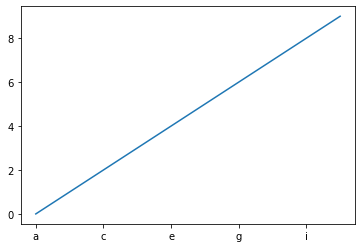

In [4]:
# make sure pandas works
pd.Series(range(10), index=list("abcdefghij")).plot()

In [5]:
# make sure scikit learn works
from sklearn.preprocessing import normalize

arr = np.arange(30).reshape(10, 3)
new_arr = normalize(arr)
(new_arr * new_arr).sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [6]:
from keras.utils import to_categorical

arr = np.array([[1, 2, 1, 0, 5], [3, 4, 1, 0, 5]])
assert to_categorical(arr).shape == (2, 5, 6)

Using TensorFlow backend.


In [7]:
from keras.layers import Input, Dense
from keras.models import Model
import keras.backend as K
import tensorflow as tf

K.clear_session()
inpt = Input(shape=(10,))
mat = Dense(1, input_shape=(10,))

res = mat(K.variable(np.ones((10, 1))))

if tf.__version__.startswith("1"):
    print(
        f"you have tensorflow version {tf.__version__}."
        "Your code may not be compatible with everything we do in class"
    )
    result = K.eval(res)
else:
    result = res.numpy()
    assert (result == K.eval(res)).all()

print(result)

AttributeError: 'Tensor' object has no attribute 'numpy'

In [ ]:
K.clear_session()
inpt = Input(shape=(10,))
mat = Dense(1, input_shape=(10,))
outpt = mat(inpt)

model = Model(inpt, outpt)
model.compile("adam", loss="binary_crossentropy")
assert model.count_params() == 11
model.summary()


# Homework Problem 1: Company Descriptions from Wikipedia
Downloading data from the web is a large part of working with text.
Importantly, it can be difficult to find the __right__ data. 
Here, we will download the company descriptions from wikipedia for the current set of S&P500 companies. 

## The `wikipedia` package
You can install it with `pip install wikipedia`

We will use `wikipeda.page` to grab data
```python
import wikipedia

page = wikipedia.page(page_url)
print(page.content)
```

In [1]:
import numpy as np
import pandas as pd
%pylab inline

from tqdm import tqdm
import wikipedia

Populating the interactive namespace from numpy and matplotlib


## Part 0: get the list of the S&P500 companies
### Hint, a `wikipedia` page has a method `html()` which returns the html from the page
### pandas has `read_html` https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.read_html.html

In [2]:
sp500_url = 'List_of_S%26P_500_companies'
# your code here

## Part 2: For every S&P500 company, get the page content

In [ ]:
import json
# your code here. We suggest that you save your results
# to a json file so that you don't need to re-scrape

print("found {} results".format(len(results)))

## Part 3: Content length
 - For every page, compute the length of the text (how many characters)
 - What is the mean length(number of characters) for each gics sector. 

In [6]:
# your code here


## Part 4: Count how many times `computer` appears in the content for each company
 - what is the mean number of times it occurs in each sector?
 - Do these results make sense

In [3]:
# your code here

## Part 5: repeat part 4 with lots of words
 - try `['computer', 'oil', 'debt', 'drug', 'building', 'food']`
 - add your own words

In [12]:
words = ['computer', 'oil', 'debt', 'drug', 'building', 'food']

# one way to do this is to make a dataframe of counts,
# initialize all to 0, and then loop through and count the occurences
counts = pd.DataFrame(0, index=companies.Symbol.tolist(), columns=words)

# your code here

In [4]:
counts.groupby('GICS Sector').mean()

## Problem 2: Obtain structured company data using Regex (20%)

In [39]:
%pylab inline
import re
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [40]:
wiki_df = pd.read_csv('kdwd_r1k_articles.csv')
wiki_df.head(2)

,page_id,page_title,page_views,intro_text
0,856,Apple Inc.,190485,Apple Inc. is an American multinational techno...
1,2386,American Airlines,40829,"American Airlines, Inc. (AA) is a major Americ..."


### -) Write a regex to find unusually capitalized terms
Sometimes product names will have unusual capitalization such as iPhone or ThinkPad. Find a list of such terms and investigate if you think some of them are products.

In [41]:
maybe_products_ptn = r'[\w][A-Z]' # find the correct regular expression here


# code here!
import numpy as np

maybe_products_set = np.array([])
for _, row in wiki_df.iterrows():
    splitedWordsList = re.split(r'[^\w]', row['intro_text'])
    for word in splitedWordsList:
        m = re.search(maybe_products_ptn, word)
        if m: maybe_products_set = np.append(maybe_products_set, word)

print(len(maybe_products_set), 'terms found that are potential products')

2182 terms found that are potential products


In [42]:
# verify that we found some of the key terms
assert('iPhone' in maybe_products_set)
assert('ThinkPad' in maybe_products_set)

### -) Parse company acquisition data from plain text

We are looking to identify the following types of patterns.<br />
`'Citrix acquired Sequoia Software Corp'`<br />
`'Moody\'s was acquired by Dun & Bradstreet in 1962.'`<br />
The idea here is to look for patterns around the word 'acquire' with two valid entities on either side, and an option year at the end.<br />
<span style="color:orange">Helpful Reminder:</span> you can create non-capturing capture groups via `(?:capture this|or that)`

In [43]:
# find a way to capture, 'FedEx', 'Coca-Cola', 'Sequoia Software Corp', 'Dun & Bradstreet' and 'Moody\'s'
company_ptn = r'\b[A-Z][\w]*\'?[\w]*(?:(?:(?:\s\&\s|\s)|\-)+[A-Z][\w]*\b)*'  # write pattern

maybe_companies_set = np.array([])

# code here!
for _, row in wiki_df.iterrows():
    newList = re.findall(company_ptn, row['intro_text'])
    maybe_companies_set = np.concatenate((maybe_companies_set, newList), axis=0)

print(len(maybe_companies_set), 'terms found that are potential companies')

16375 terms found that are potential companies


In [44]:
# verify that we found some of the key terms
assert('FedEx' in maybe_companies_set)
assert('Coca-Cola' in maybe_companies_set)
assert('Sequoia Software Corp' in maybe_companies_set)
assert('Dun & Bradstreet' in maybe_companies_set)
assert('Moody\'s' in maybe_companies_set)

In [45]:
# acquisition pattern
acquisition_ptn = r'(?:acquired|was acquired by)'

# find a way to optionally capture the year such as ' in 1962'
optional_year_ptn = r'(?: in [12][0-9]{3}\b)?'

In [46]:
# let's assemble the patterns together to a full capture pattern
full_acquisition_pattern = (
    company_ptn + r'\s+' + acquisition_ptn + r'\s+' + company_ptn + optional_year_ptn
)

In [47]:
acquisition_strings = []
for _, row in wiki_df.iterrows():
    acquisition_strings.extend(re.findall(full_acquisition_pattern, row['intro_text']))
print(len(acquisition_strings), 'potential acquisitions found.')

23 potential acquisitions found.


In [48]:
# verify that we found some of the key terms
assert('Citrix acquired Sequoia Software Corp' in acquisition_strings)
assert('Moody\'s was acquired by Dun & Bradstreet in 1962' in acquisition_strings)

### -) Question: Are there any failures false positives in your results? If so, how could you account for them?

In [49]:
# brief answer here
acquisition_strings
# Two "It" Appear in the list, which can be seen as false positives as "It" only refers to a company but is not it's name.
# Perhaps one way to account for it is to remove common stop words in maybe_companies_set.

['Citrix acquired Sequoia Software Corp',
 'Citrix acquired Framehawk',
 'Aflac acquired Continental American Insurance Company',
 'Giannini acquired Banca',
 'It was acquired by Avago Technologies in 2016',
 "Moody's was acquired by Dun & Bradstreet in 1962",
 'Brookfield acquired Rouse Properties in 2016',
 'Medtronic acquired Irish',
 'ACE Limited acquired Chubb in 2016',
 'Lottomatica acquired Gtech Corporation',
 'CIT Group acquired OneWest Bank',
 'Jacobs acquired CH2M Hill',
 'Advance Auto Parts acquired Carport Auto Parts',
 'Advance acquired Discount Auto Parts',
 'Advance Auto Parts acquired BWP Distributors',
 'Thermo Fisher acquired Life Technologies Corporation',
 'Bell Atlantic acquired GTE',
 'It was acquired by FIS',
 'Keurig Green Mountain acquired Dr Pepper Snapple Group',
 'Gendex Corporation acquired Dentsply International Inc',
 'Sovran Self Storage acquired LifeStorage LP',
 "Novartis acquired Incyte's",
 'Colfax acquired British Charter International PLC']

### -) Let's look into speed of regex matching

In [50]:
# write a simple pattern of your choice to search for in our dataset
search_ptn = r'iPhone'

In [51]:
# assemble a list of strings
doc_list = wiki_df['intro_text'].tolist()

In [52]:
%%timeit
# evaluation loop here
for text in doc_list:
    re.search(search_ptn, text)

1.41 ms ± 50.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Let's compile the regex and see if this increases the speed using `re.compile`

In [53]:
%%timeit
compile_ptn = re.compile(r'iPhone')
# evaluation loop here
for text in doc_list:
    compile_ptn.search(text)

907 µs ± 23 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### A note on speed: basic string operations are always faster than regex
#### show this using `'my_string' in 'other_string'`

In [29]:
# code here!

In [54]:
%%timeit
'my_string' in 'other_string'

52.6 ns ± 2.97 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [55]:
%%timeit
re.search('my_string','other_string') 

800 ns ± 39.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## Problem 3: Key corporate concepts (20%)

### In this problem we would like to look at how important certain key terms are across various different companies in the wikipedia dataset

### Do this for the terms `apple`, `cloud`, `healthcare` and `personal computers`
### Which companies use each of these terms the most?

### Hint: you can do this several different ways, but you may want to consider tf-idf, since it will help you for the next Problem

In [56]:
# code here!
# From lecture 1 & 2
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(
    
    analyzer='word',
    token_pattern='(?u)\\b\\w\\w+\\b',
    
    lowercase=True,
    stop_words=None,

    ngram_range=(1, 2),
    
    min_df=3,
    max_df=1.0,
    
)
count_matrix = vectorizer.fit_transform(wiki_df['intro_text'].tolist());
vocab = list(pd.Series(vectorizer.vocabulary_).sort_values().index)

def get_tf_idf_counts(n_row):
    # get number of occurences of ngrams that are not zero
    data = []
    for idx in count_matrix[n_row].nonzero()[1]:
        n_count = count_matrix[n_row, idx]
        data.append((n_count, vocab[idx]))
    ngram_counts = pd.DataFrame(data, columns=['tfidf_score', 'token']).sort_values(by='tfidf_score', ascending=False)
    return ngram_counts.reset_index(drop=True)


In [57]:
# Set the keywords
keyTerms3 = np.array(['apple', 'cloud', 'healthcare', 'personal computers'])

# Create a data frame to store the tf-idf scores of the key terms for each company
tf_idfScores = pd.DataFrame(np.column_stack([wiki_df['page_title'], np.zeros( shape = (len(wiki_df['page_title']), len(keyTerms3)) )]), 
                               columns=append(["Company"], keyTerms3))

In [58]:
for n_row in np.arange(wiki_df.shape[0]):
    ngram_counts = get_tf_idf_counts(n_row)
    for term in keyTerms3:
        rank = np.asarray(np.where(ngram_counts.loc[:, 'token'] == term))
        if rank.size > 0: 
            # Update the score
            tf_idfScores.loc[n_row, term] = ngram_counts.iloc[rank[0][0],0]
        
tf_idfScores.head(5)    

,Company,apple,cloud,healthcare,personal computers
0,Apple Inc.,0.714075,0,0,0.0234897
1,American Airlines,0,0,0,0
2,Advanced Micro Devices,0,0,0,0.0881501
3,Anthem,0,0,0,0
4,Coca-Cola,0.0281244,0,0,0


In [59]:
pd.set_option('display.expand_frame_repr', False)
# Show the top 10 for each term
for term in keyTerms3:
    tf_idfScores.sort_values(by=[term], inplace=True, ascending=False)
    print(tf_idfScores.head(10),"\n")

                Company      apple      cloud healthcare personal computers
0            Apple Inc.   0.714075          0          0          0.0234897
14                Xerox   0.189213          0          0                  0
195              Garmin   0.129485          0          0                  0
8             Microsoft   0.100082  0.0542954          0          0.0680391
86         Corning Inc.  0.0799841          0          0                  0
66      Electronic Arts  0.0605762          0          0          0.0617729
79   Berkshire Hathaway  0.0490558          0          0                  0
7                 Intel  0.0403504          0          0          0.0411475
4             Coca-Cola  0.0281244          0          0                  0
505        Kimco Realty          0          0          0                  0 

           Company apple     cloud healthcare personal computers
460           Okta     0  0.425402          0                  0
321    F5 Networks     0  0.2728

## Problem 4: Measure company similarity through word overlap (20%)

### We would like to understand how similar different companies are based on the words used in their wikipedia description. Presumably a company providing shipping services will have few words overlapping with a technology company. The goal of this exercise is to group companies based on their description and see if we can recover groups that resemble industry sectors.

### Question: There are a few ways of doing this. Two ways that we learned, are counting (using CountVectorizer) or using the tfidf score (using TfidfVectorizer). What are the main differences between these methods for this exercise and why are you choosing to use one over the other?

### Find the cosine similarity between words from Apple and Coca-Cola as well as Apple and Microsoft. Which pair is more similar?

In [223]:
from sklearn.metrics.pairwise import cosine_similarity

In [193]:
apple_row_nr = 0
cocacola_row_nr = 4
microsoft_row_nr = 8

# get similarity between each of these

# code here!

### Next, let's look at a fullblown NxN similarity matrix. Luckily scikit-learn has this optimized for sparse matrices, so we don't need to worry about computation explosion. A nice way to look at the resulting similarity matrix between our companies is a method called hierarchical clustering. (find more information here: https://en.wikipedia.org/wiki/Hierarchical_clustering)

### The seaborn library has nice built-in support for doing this: https://seaborn.pydata.org/generated/seaborn.clustermap.html

In [212]:
# similarity_matrix = 

In [ ]:
import seaborn as sns

# code for plot here

### To investigate the output a little further let's zoom into the top left where we can find the most strongly clustered companies. Question: which companies are these and what industry sector do they belong to?

### Hint: You can access the clustered data from the seaborn plot using `.data2d`

In [ ]:
# code here